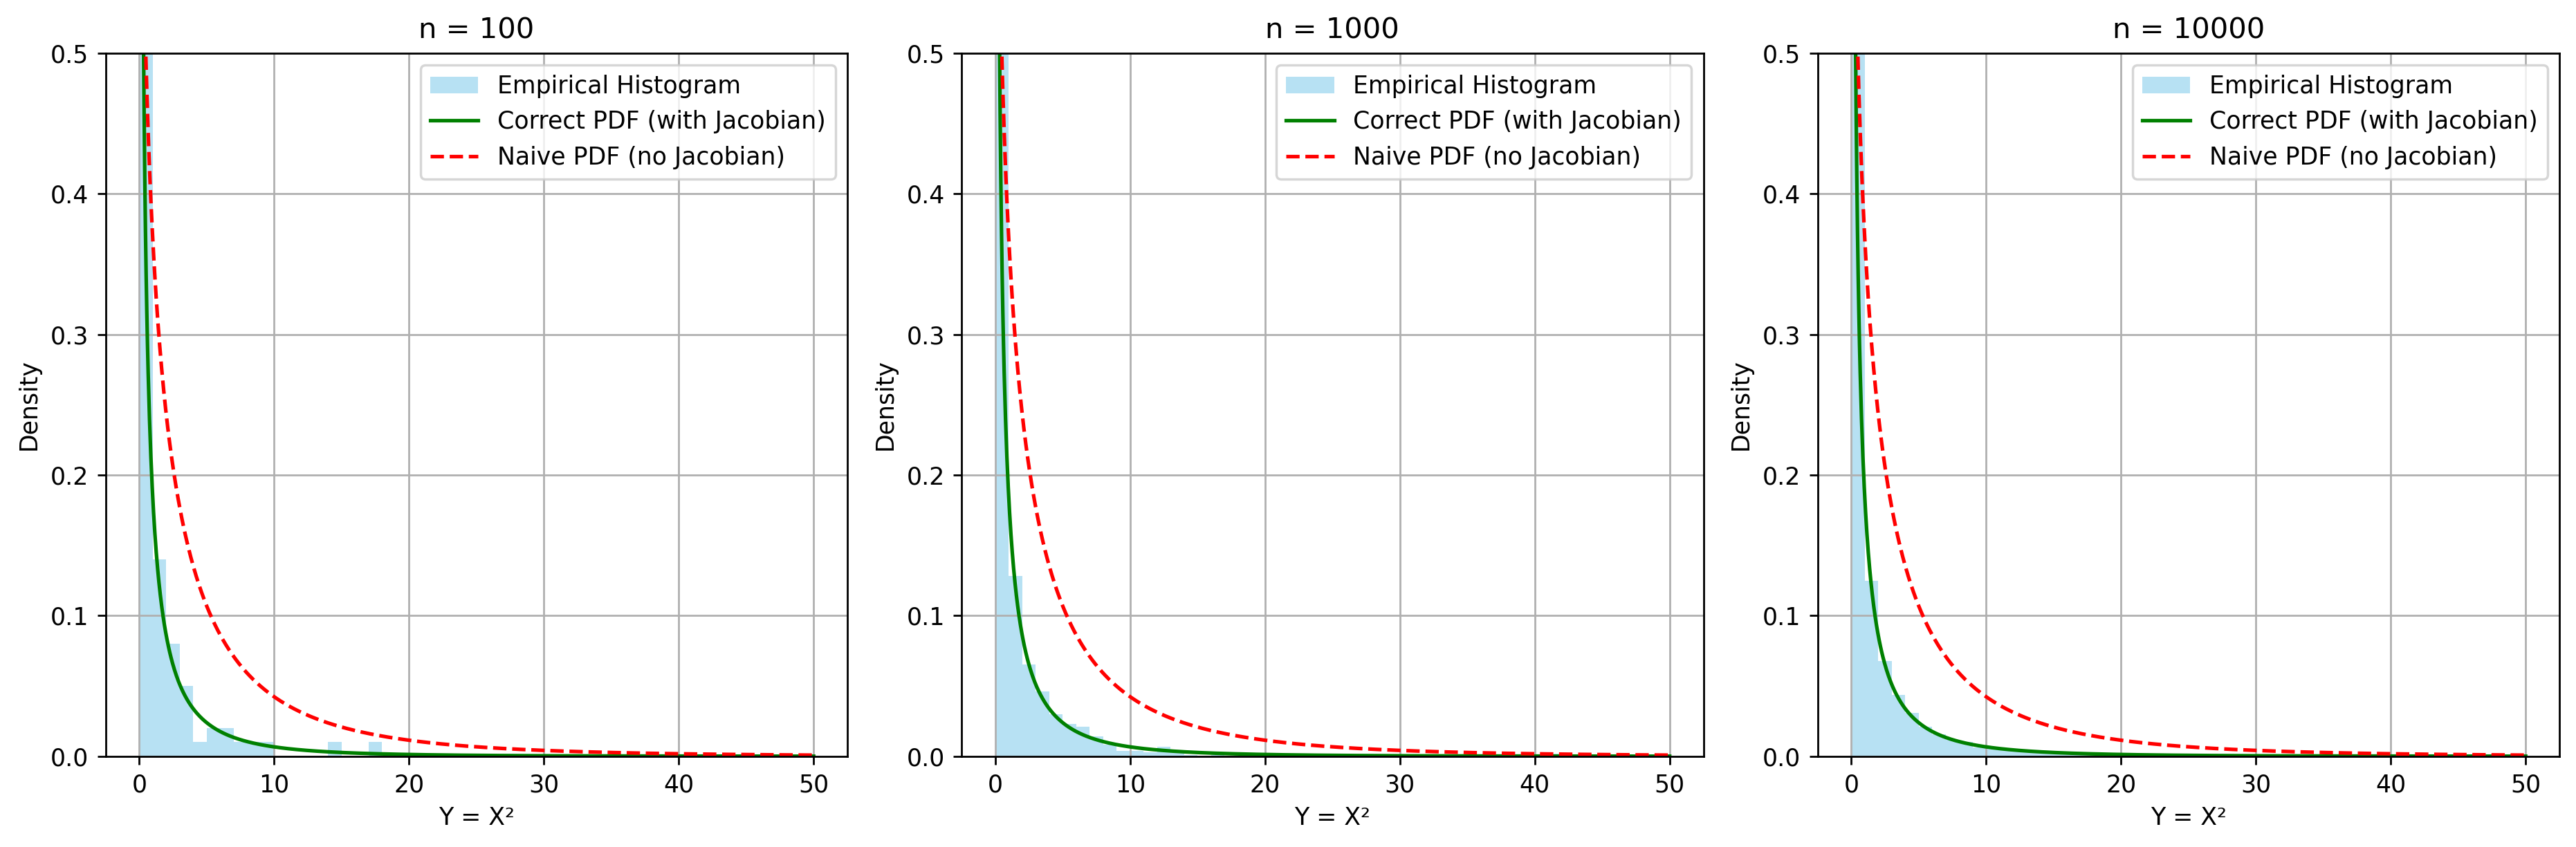

In [3]:
import numpy as np
import matplotlib.pyplot as plt



def correct_pdf(y):
    return np.exp(-np.sqrt(y)) / (2 * np.sqrt(y))

def naive_pdf(y):
    return np.exp(-np.sqrt(y))

# Sample sizes to test
sample_sizes = [100, 1_000, 10_000]

fig, axs = plt.subplots(1, len(sample_sizes), figsize=(15, 5))

y_vals = np.linspace(0.01, 50, 1000)  # Range for plotting theoretical pdfs

for i, n in enumerate(sample_sizes):
    # Sample X ~ Exp(1)
    x = np.random.exponential(scale=1, size=n)
    y = x**2
    
    # Plot histogram (normalized to density)
    axs[i].hist(y, bins=50, range=(0, 50), density=True, alpha=0.6, color='skyblue', label='Empirical Histogram')
    
    # Plot theoretical pdfs
    axs[i].plot(y_vals, correct_pdf(y_vals), 'g-', label='Correct PDF (with Jacobian)')
    axs[i].plot(y_vals, naive_pdf(y_vals), 'r--', label='Naive PDF (no Jacobian)')
    
    axs[i].set_title(f'n = {n}')
    axs[i].set_xlabel('Y = X²')
    axs[i].set_ylabel('Density')
    axs[i].legend()
    axs[i].set_ylim(0, 0.5)  # For consistent viewing
    axs[i].grid(True)  # Add grid to each subplot

# Set the figure DPI to 250 for higher resolution
fig.set_dpi(250)

plt.tight_layout()
plt.show()


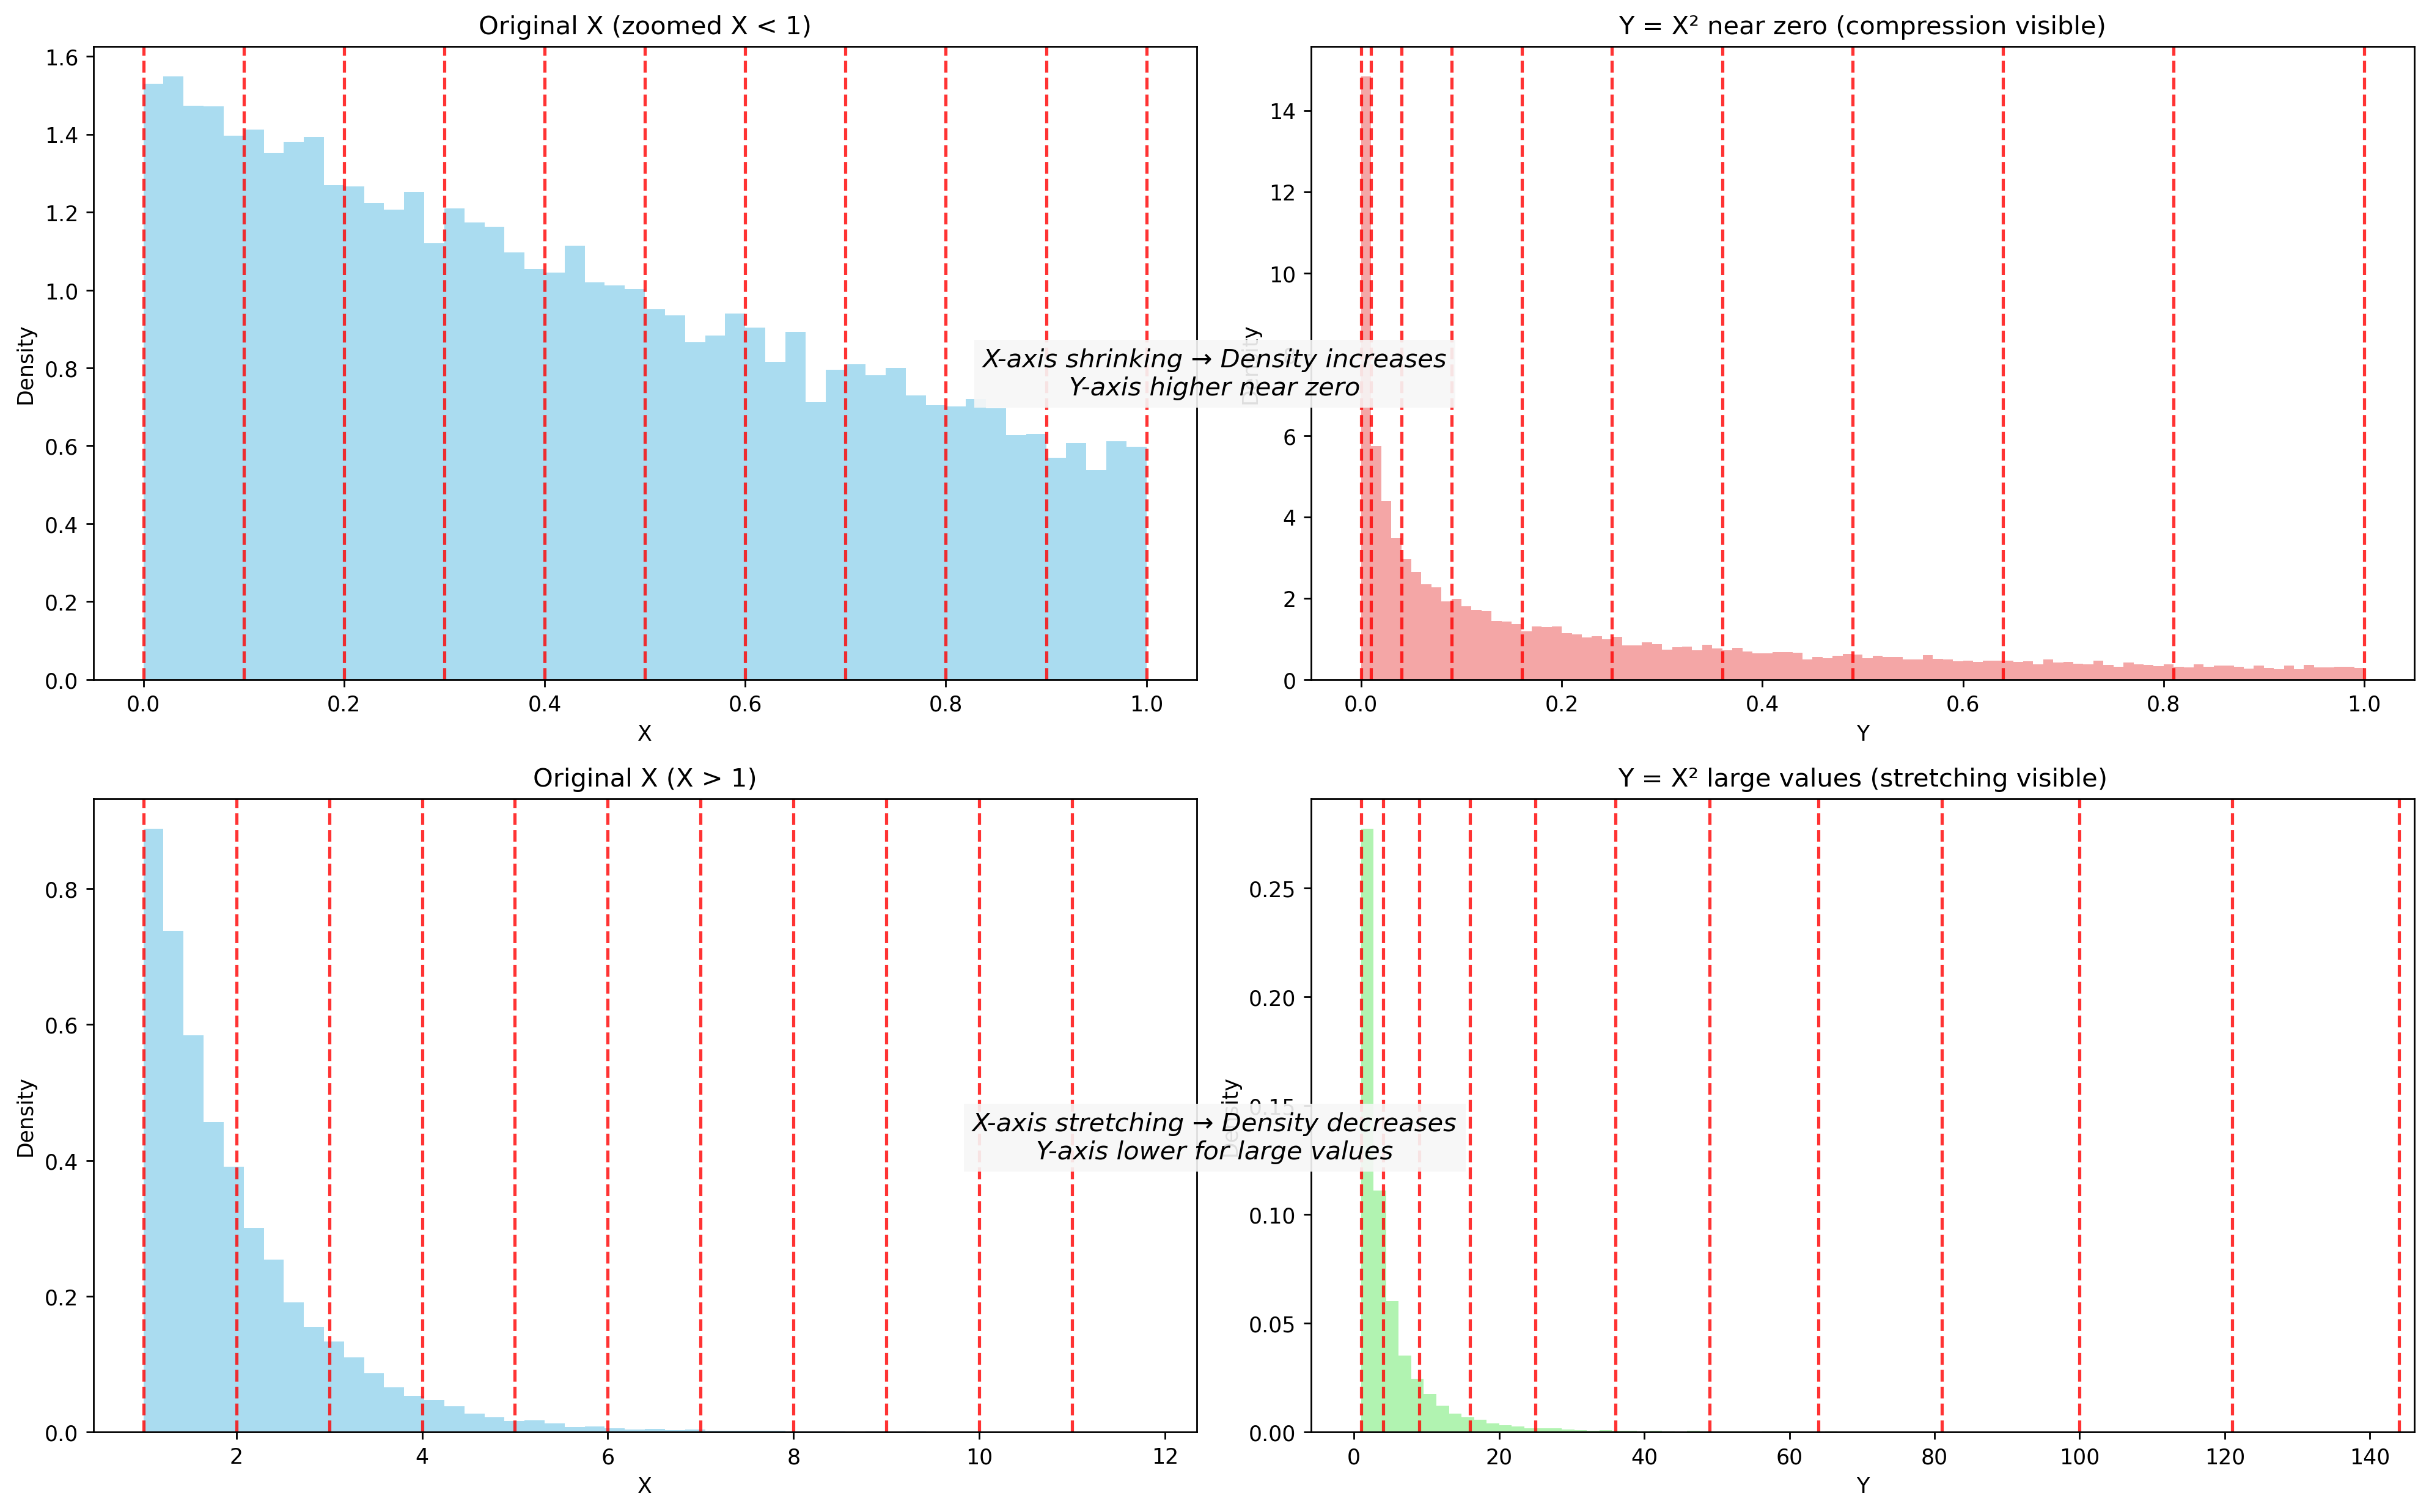

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate large sample for clear visuals
n = 50000
x = np.random.exponential(scale=1, size=n)
y = x**2

fig = plt.figure(figsize=(16, 10))

def plot_histogram(ax, data, bins, density, color, alpha, title, xlabel, ylabel):
    ax.hist(data, bins=bins, density=density, color=color, alpha=alpha)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

# Plot 1: X small values (compression source)
ax1 = fig.add_subplot(2, 2, 1)
plot_histogram(ax1, x[x < 1], bins=50, density=True, color='skyblue', alpha=0.7,
               title='Original X (zoomed X < 1)', xlabel='X', ylabel='Density')

# Equal-width intervals of 0.1 on small X
small_x_lines = np.arange(0, 1.01, 0.1)
for line in small_x_lines:
    ax1.axvline(line, color='red', linestyle='--', alpha=0.8)

# Plot 2: Y near zero (showing shrink/compression)
ax2 = fig.add_subplot(2, 2, 2)
plot_histogram(ax2, y[y < 1], bins=100, density=True, color='lightcoral', alpha=0.7,
               title='Y = X² near zero (compression visible)', xlabel='Y', ylabel='Density')

# Mapped small intervals on Y (very narrow!)
small_y_lines = small_x_lines**2
for line in small_y_lines:
    ax2.axvline(line, color='red', linestyle='--', alpha=0.8)

# Plot 3: X larger values (stretching source)
ax3 = fig.add_subplot(2, 2, 3)
plot_histogram(ax3, x[(x > 1) & (x < 12)], bins=50, density=True, color='skyblue', alpha=0.7,
               title='Original X (X > 1)', xlabel='X', ylabel='Density')

# Equal-width intervals of 1 on larger X
large_x_starts = [1, 3, 5, 7, 9, 11]
large_x_lines = large_x_starts + [s + 1 for s in large_x_starts]
for line in large_x_lines:
    if line < 12:
        ax3.axvline(line, color='red', linestyle='--', alpha=0.8)

# Plot 4: Y large values (showing stretch)
ax4 = fig.add_subplot(2, 2, 4)
plot_histogram(ax4, y[(y > 1) & (y < 150)], bins=80, density=True, color='lightgreen', alpha=0.7,
               title='Y = X² large values (stretching visible)', xlabel='Y', ylabel='Density')

# Mapped large intervals on Y (huge gaps!)
large_y_lines = np.array(large_x_lines)**2
for line in large_y_lines:
    if line < 150:
        ax4.axvline(line, color='red', linestyle='--', alpha=0.8)

# Update annotation styles with modified font style
fig.text(0.5, 0.75, "X-axis shrinking → Density increases\nY-axis higher near zero", 
         ha='center', va='center', fontsize=12, color='black', 
         fontstyle='italic', bbox=dict(facecolor='#f7f7f7', edgecolor='none', alpha=0.9))

fig.text(0.5, 0.25, "X-axis stretching → Density decreases\nY-axis lower for large values", 
         ha='center', va='center', fontsize=12, color='black', 
         fontstyle='italic', bbox=dict(facecolor='#f7f7f7', edgecolor='none', alpha=0.9))

fig.set_dpi(250)
plt.tight_layout()
plt.show()

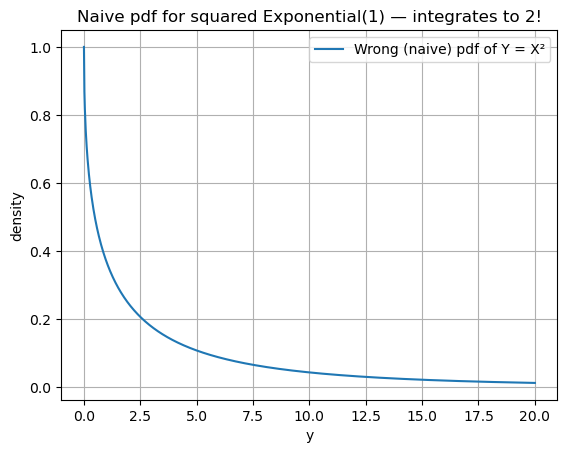

Numerical integral ≈ 2.000 (should be 1, but it's 2)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# CDF of Exponential(1): F(x) = 1 - exp(-x) for x >= 0
def cdf_exp(x):
    return 1 - np.exp(-x)

# Wrong (naive) pdf for Y = X²: just substitute x = sqrt(y)
def wrong_pdf(y):
    return np.exp(-np.sqrt(y))  # This integrates to 2!

# Quick plot to see it
y = np.linspace(0, 20, 1000)

fig = plt.figure(figsize=(10, 6))

fig.set_dpi(250)
plt.plot(y, wrong_pdf(y), label='Wrong (naive) pdf of Y = X²')
plt.title('Naive pdf for squared Exponential(1) — integrates to 2!')
plt.xlabel('y')
plt.ylabel('density')
plt.legend()
plt.grid(True)
plt.show()

# Quick numerical check of integral
from scipy.integrate import quad
integral, err = quad(wrong_pdf, 0, np.inf)
print(f"Numerical integral ≈ {integral:.3f} (should be 1, but it's 2)")